In [1]:
import torch
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()  # Initialize the parent class (nn.Module)

        # First convolutional layer: 1 input channel (grayscale), 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)

        # First average pooling layer: 2x2 kernel, stride 2
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)

        # Second average pooling layer: 2x2 kernel, stride 2
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        # First fully connected layer: 16*5*5 input features, 120 output features
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # Second fully connected layer: 120 input features, 84 output features
        self.fc2 = nn.Linear(120, 84)

        # Third fully connected layer: 84 input features, 10 output features (for 10 classes)
        self.fc3 = nn.Linear(84, 10)

        # Activation function: Tanh (used after convolutional and fully connected layers)
        self.activation = nn.Tanh()

    def forward(self, x):
        # Apply first convolutional layer followed by Tanh activation
        x = self.activation(self.conv1(x))

        # Apply first average pooling layer
        x = self.pool1(x)

        # Apply second convolutional layer followed by Tanh activation
        x = self.activation(self.conv2(x))

        # Apply second average pooling layer
        x = self.pool2(x)

        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)  # Reshape to [batch_size, 16*5*5]

        # Apply first fully connected layer followed by Tanh activation
        x = self.activation(self.fc1(x))

        # Apply second fully connected layer followed by Tanh activation
        x = self.activation(self.fc2(x))

        # Apply third fully connected layer (no activation, outputs raw logits)
        x = self.fc3(x)

        return x


# Example usage
model = LeNet5()  # Instantiate the LeNet-5 model

# Create a random input tensor: batch of 1, 1 channel (grayscale), 32x32 image
input_tensor = torch.randn(1, 1, 32, 32)

# Pass the input through the model
output = model(input_tensor)

# Print the output shape: should be [1, 10] (batch of 1, 10 classes)
print(output.shape)  # Output shape: [1, 10]

torch.Size([1, 10])


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the LeNet-5 model (same as before)
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool1(x)
        x = self.activation(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 32x32
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizer

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

        running_loss += loss.item()

        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Loss: {running_loss / len(train_loader):.4f}")

# Evaluation
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/10], Step [100/938], Loss: 0.3040
Epoch [1/10], Step [200/938], Loss: 0.2576
Epoch [1/10], Step [300/938], Loss: 0.1408
Epoch [1/10], Step [400/938], Loss: 0.1550
Epoch [1/10], Step [500/938], Loss: 0.0666
Epoch [1/10], Step [600/938], Loss: 0.2834
Epoch [1/10], Step [700/938], Loss: 0.1280
Epoch [1/10], Step [800/938], Loss: 0.1558
Epoch [1/10], Step [900/938], Loss: 0.1157
Epoch [1/10], Average Loss: 0.2677
Epoch [2/10], Step [100/938], Loss: 0.1669
Epoch [2/10], Step [200/938], Loss: 0.0360
Epoch [2/10], Step [300/938], Loss: 0.0463
Epoch [2/10], Step [400/938], Loss: 0.0543
Epoch [2/10], Step [500/938], Loss: 0.1439
Epoch [2/10], Step [600/938], Loss: 0.0180
Epoch [2/10], Step [700/938], Loss: 0.0662
Epoch [2/10], Step [800/938], Loss: 0.2303
Epoch [2/10], Step [900/938], Loss: 0.1279
Epoch [2/10], Average Loss: 0.0861
Epoch [3/10], Step [100/938], Loss: 0.0855
Epoch [3/10], Step [200/938], Loss: 0.0268
Epoch [3/10], Step [300/938], Loss: 0.0912
Epoch [3/10], Step [400/938

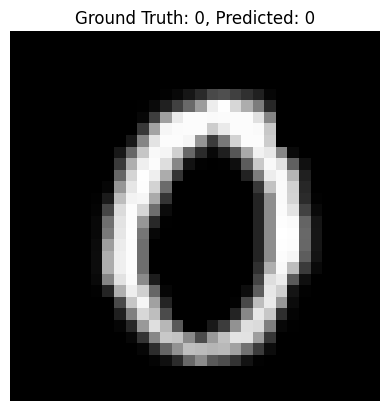

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Get a random image and label from the test dataset
data, target = next(iter(test_loader))  # Get a batch of data
image, label = data[13], target[13]  # Pick the first image and label from the batch

# Add a batch dimension (since the model expects a batch of images)
image = image.unsqueeze(0)

# Forward pass to get the predicted label
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)  # Get the predicted class

# Convert the image tensor to a numpy array for visualization
image = image.squeeze().numpy()  # Remove batch dimension and convert to numpy

# Display the image and labels
plt.imshow(image, cmap='gray')
plt.title(f"Ground Truth: {label}, Predicted: {predicted.item()}")
plt.axis('off')
plt.show()